In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

In [33]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import os
# print(os.listdir("../input"))

# import warnings
# warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [4]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [5]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


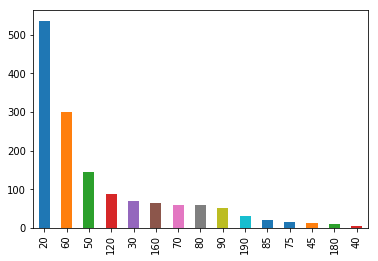

In [9]:
train.MSSubClass.value_counts().plot.bar()

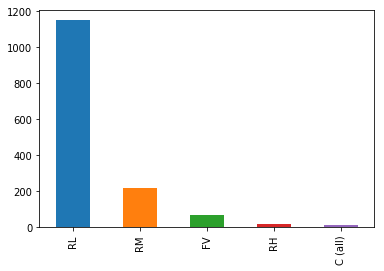

In [15]:
train.MSZoning.value_counts().plot.bar()

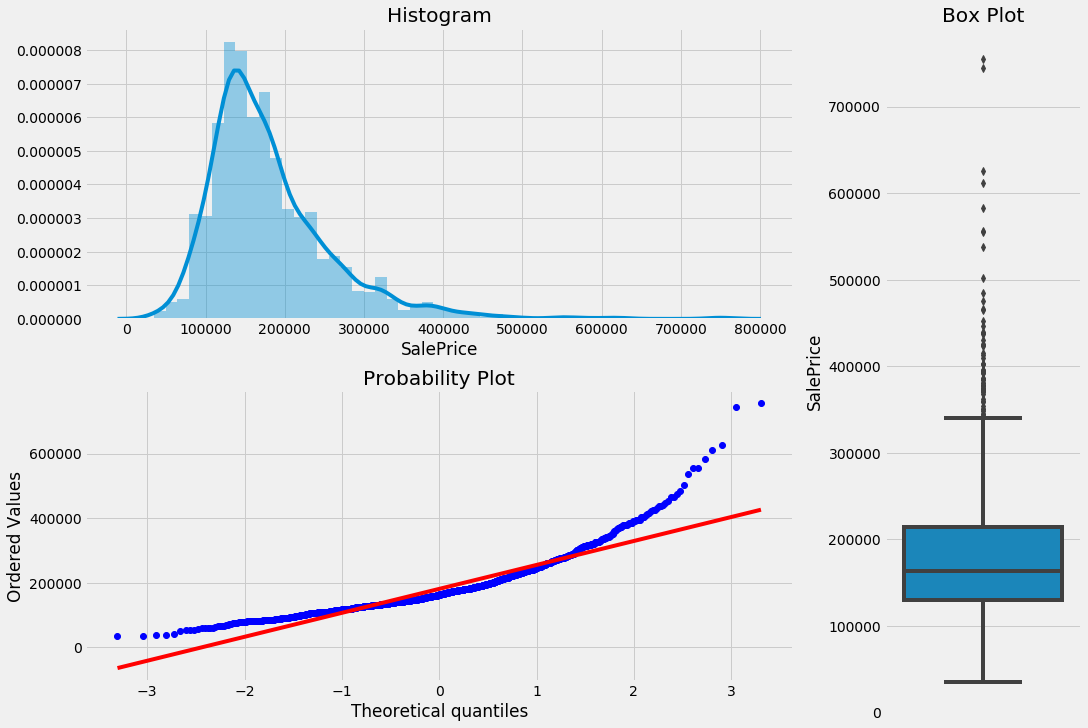

In [16]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(train, 'SalePrice')

In [17]:
#skewness and kurtosis
print("Skewness: " + str(train['SalePrice'].skew()))
print("Kurtosis: " + str(train['SalePrice'].kurt()))

Skewness: 1.88287575977
Kurtosis: 6.53628186006


In [27]:
## Getting the correlation of all the features with target variable. 
(train.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

In [26]:
len(train.columns)

81

In [28]:
def customized_scatterplot(y, x):
        ## Sizing the plot. 
    style.use('fivethirtyeight')
    plt.subplots(figsize = (15,10))
    ## Plotting target variable with predictor variable(OverallQual)
    sns.scatterplot(y = y, x = x);

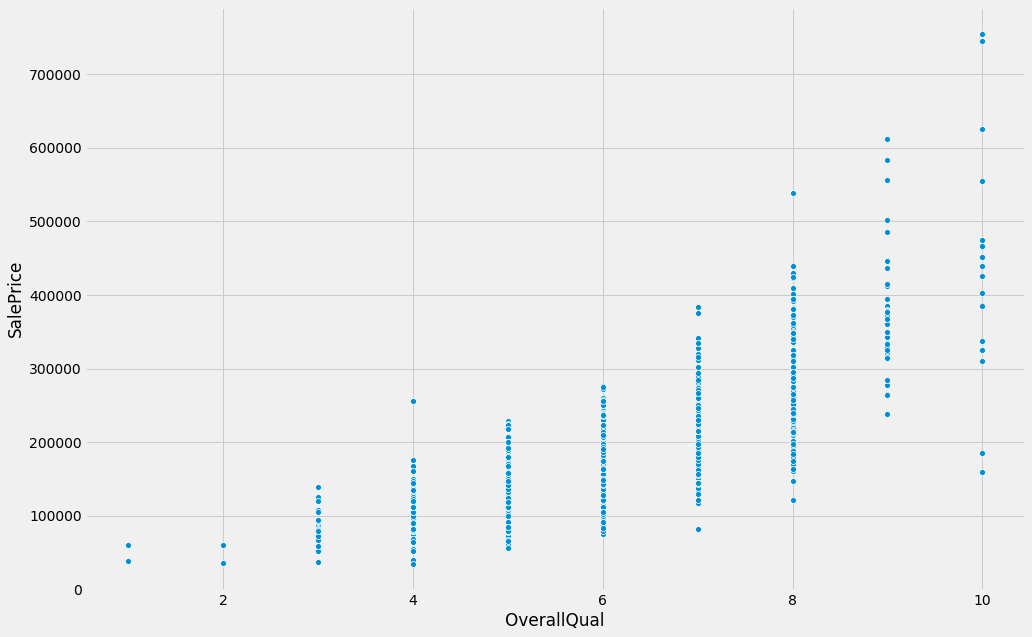

In [34]:
customized_scatterplot(train.SalePrice, train.OverallQual)

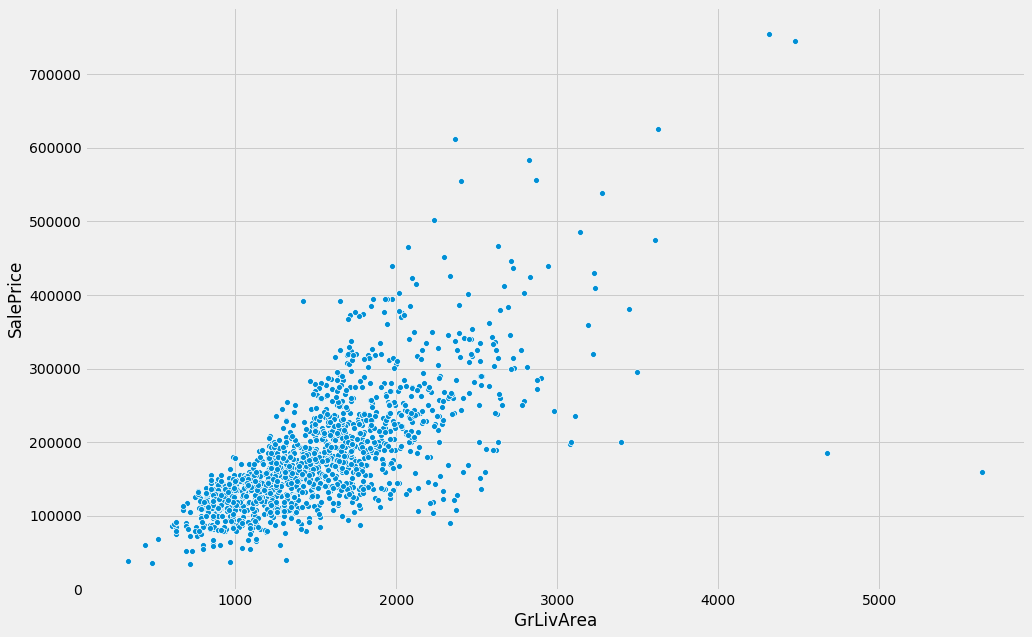

In [35]:
customized_scatterplot(train.SalePrice, train.GrLivArea)

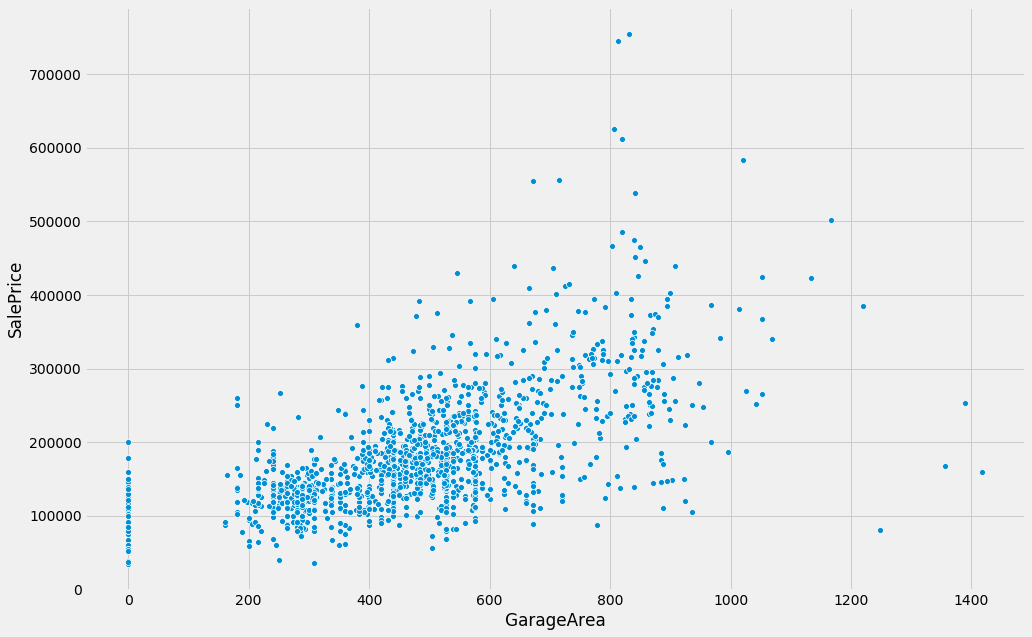

In [36]:
customized_scatterplot(train.SalePrice, train.GarageArea);

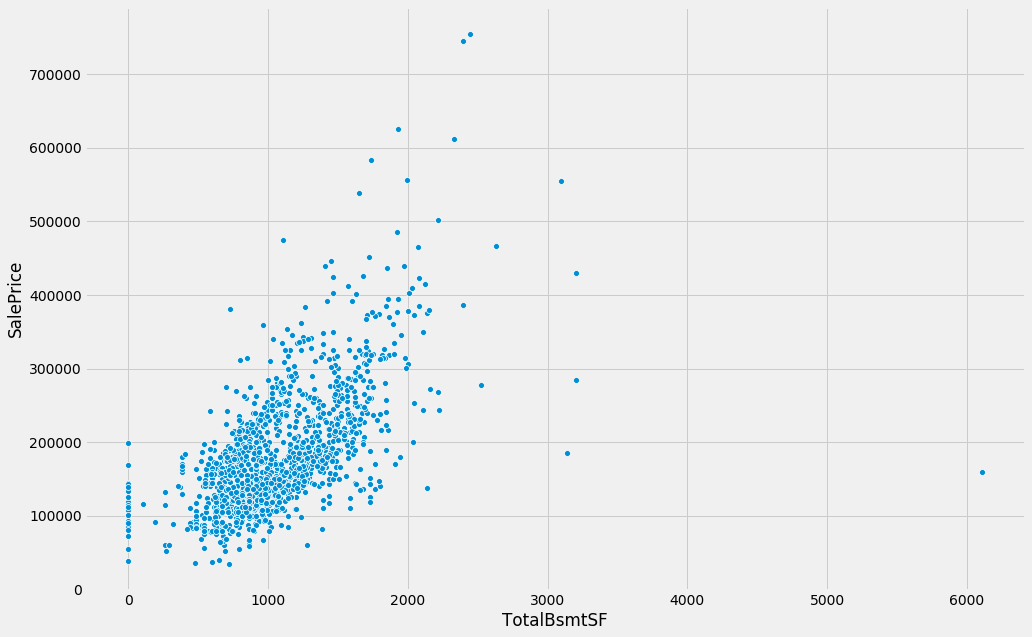

In [37]:
customized_scatterplot(train.SalePrice, train.TotalBsmtSF)

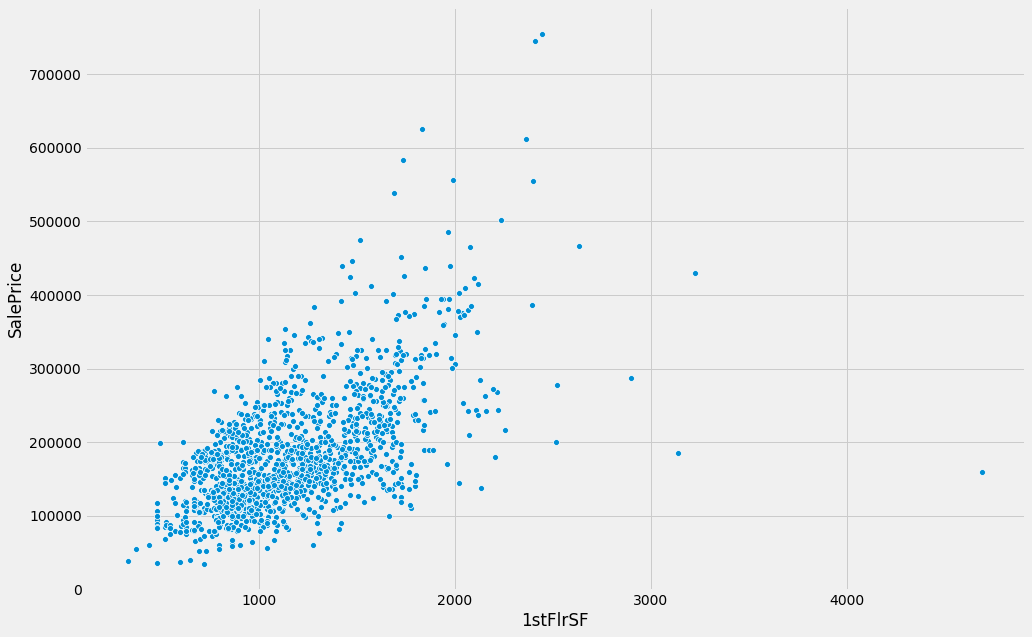

In [38]:
customized_scatterplot(train.SalePrice, train['1stFlrSF']);

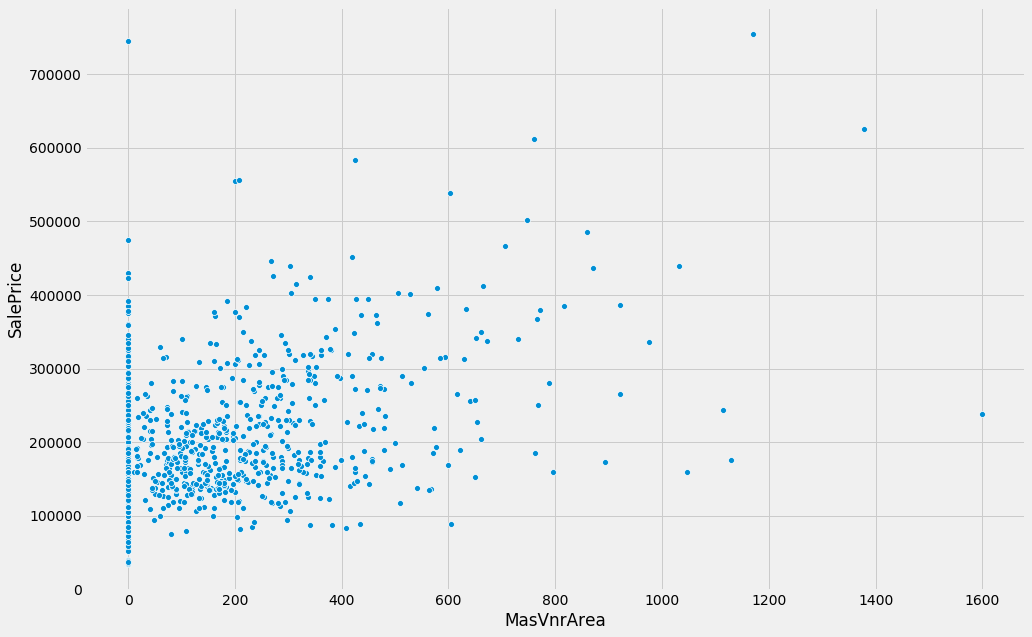

In [39]:
customized_scatterplot(train.SalePrice, train.MasVnrArea);

In [40]:
## Deleting those two values with outliers. 
train = train[train.GrLivArea < 4500]
train.reset_index(drop = True, inplace = True)

## save a copy of this dataset so that any changes later on can be compared side by side.
previous_train = train.copy()

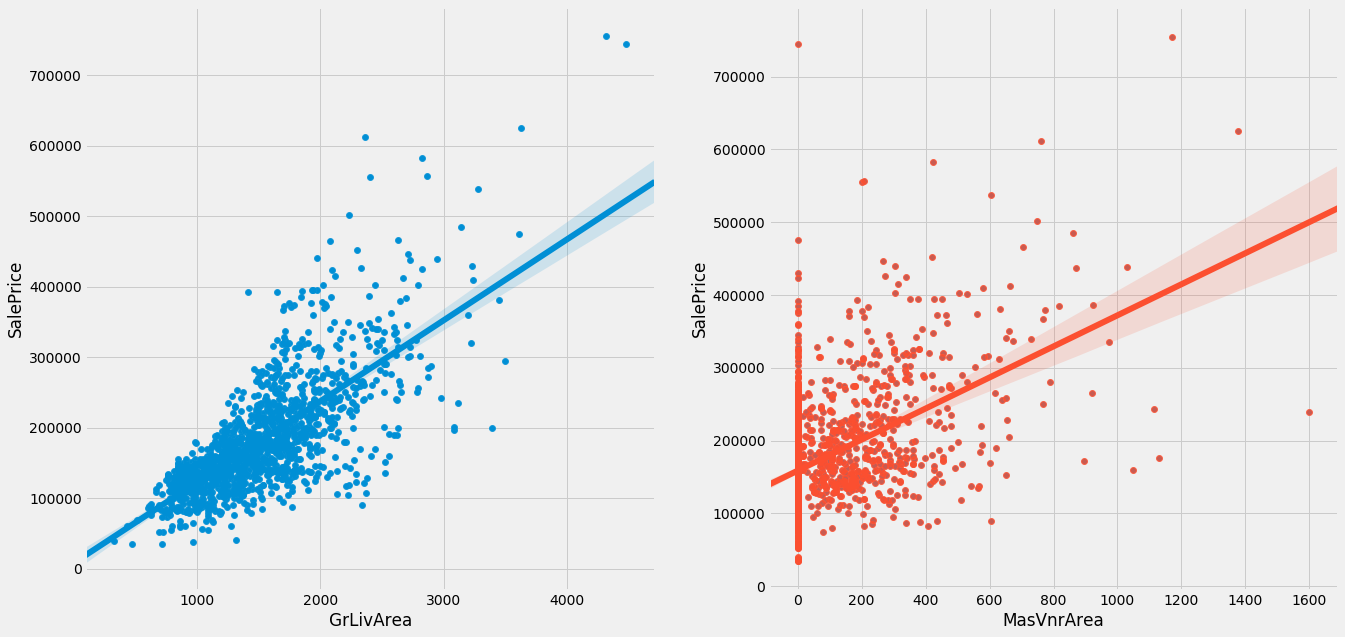

In [41]:
## Plot sizing. 
fig, (ax1, ax2) = plt.subplots(figsize = (20,10), ncols=2,sharey=False)
## Scatter plotting for SalePrice and GrLivArea. 
sns.scatterplot( x = train.GrLivArea, y = train.SalePrice,  ax=ax1)
## Putting a regression line. 
sns.regplot(x= train.GrLivArea, y= train.SalePrice, ax=ax1)

## Scatter plotting for SalePrice and MasVnrArea. 
sns.scatterplot(x = train.MasVnrArea,y = train.SalePrice, ax=ax2)
## regression line for MasVnrArea and SalePrice. 
sns.regplot(x=train.MasVnrArea, y=train.SalePrice, ax=ax2);

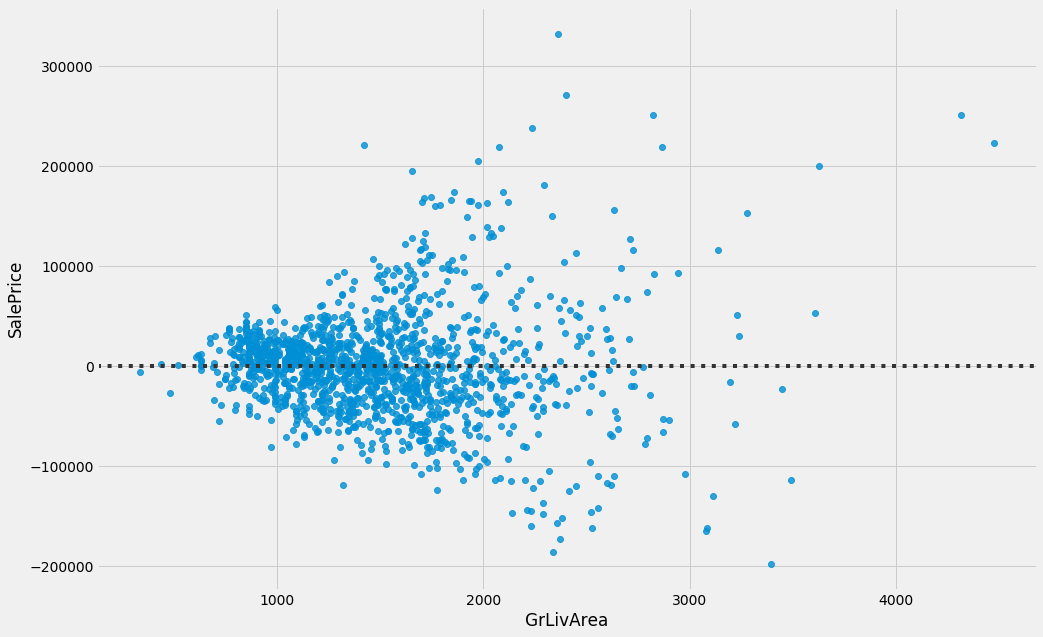

In [42]:
plt.subplots(figsize = (15,10))
sns.residplot(train.GrLivArea, train.SalePrice);

/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


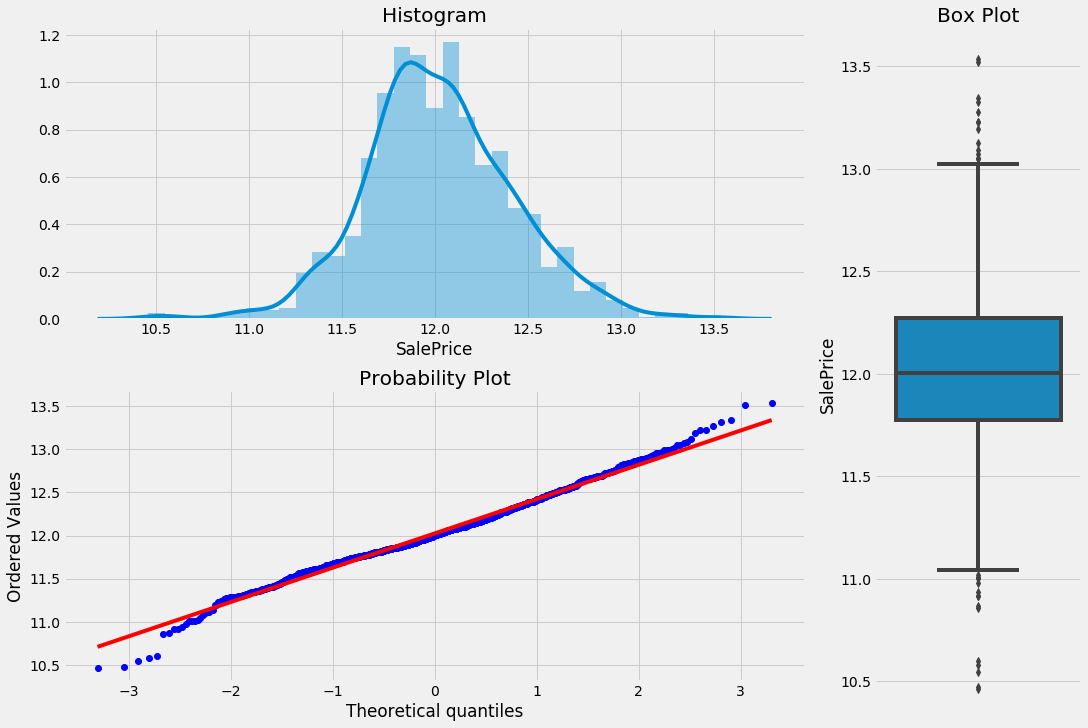

In [43]:
## trainsforming target variable using numpy.log1p, 
train["SalePrice"] = np.log1p(train["SalePrice"])

## Plotting the newly transformed response variable
plotting_3_chart(train, 'SalePrice')

In [44]:
train["SalePrice"]

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
7       12.206078
8       11.774528
9       11.678448
10      11.771444
11      12.751303
12      11.877576
13      12.540761
14      11.964007
15      11.790565
16      11.911708
17      11.407576
18      11.976666
19      11.842236
20      12.692506
21      11.845110
22      12.345839
23      11.774528
24      11.944714
25      12.454108
26      11.811555
27      12.631344
28      12.242891
29      11.134604
          ...    
1428    12.165985
1429    11.875838
1430    11.074436
1431    12.136192
1432    11.982935
1433    12.066816
1434    11.699413
1435    12.885673
1436    11.916395
1437    12.190964
1438    12.160034
1439    11.913720
1440    12.644331
1441    11.703554
1442    12.098493
1443    11.767575
1444    11.969724
1445    12.388398
1446    11.626263
1447    11.429555
1448    11.820418
1449    12.567555
1450    11.884496
1451    11.344519
1452    12

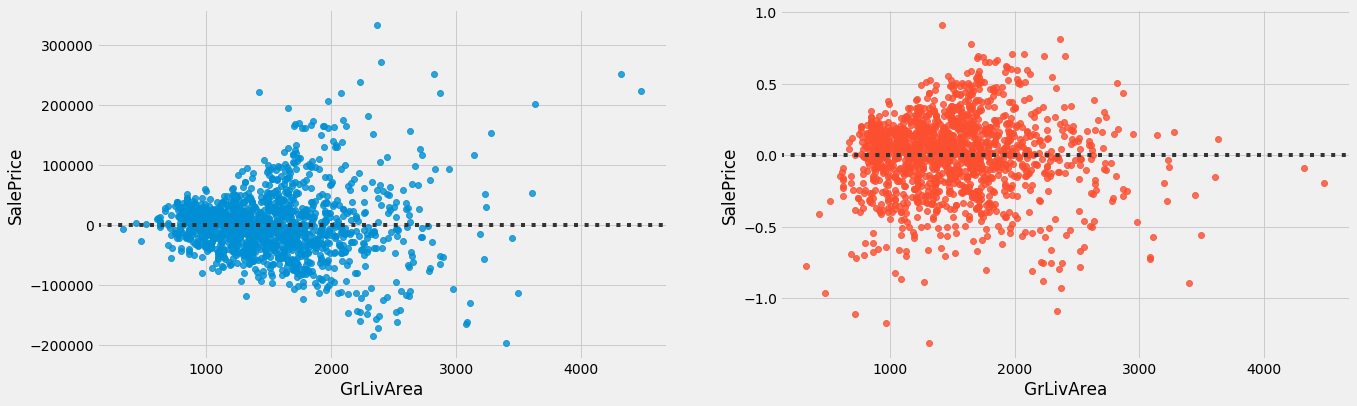

In [45]:
## Customizing grid for two plots. 
fig, (ax1, ax2) = plt.subplots(figsize = (20,6), ncols=2, sharey = False, sharex=False)
## doing the first scatter plot. 
sns.residplot(x = previous_train.GrLivArea, y = previous_train.SalePrice, ax = ax1)
## doing the scatter plot for GrLivArea and SalePrice. 
sns.residplot(x = train.GrLivArea, y = train.SalePrice, ax = ax2);

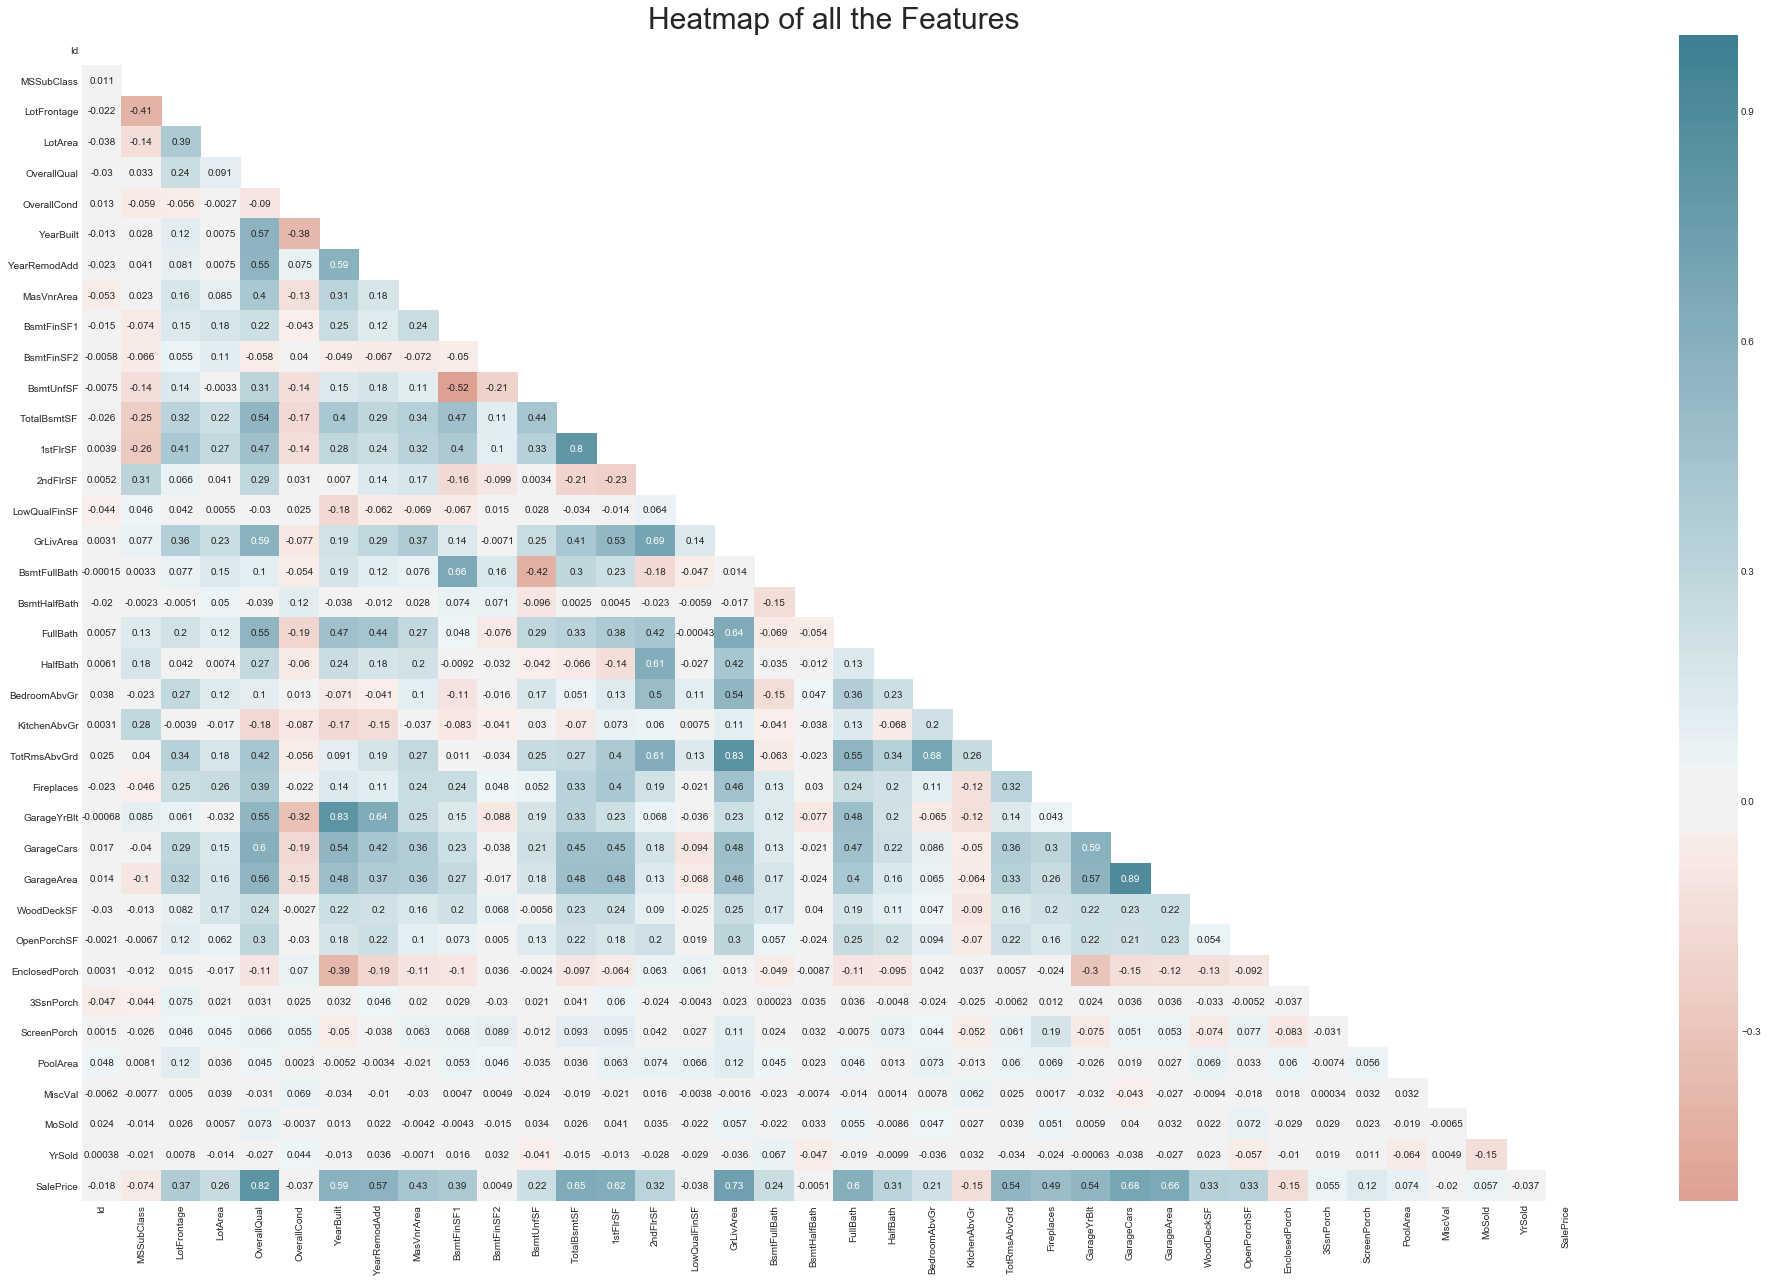

In [46]:
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(train.corr(), cmap=sns.diverging_palette(20, 220, n=200), mask = mask, annot=True, center = 0, );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

In [48]:
train['BsmtFinSF1'].describe()

count    1458.000000
mean      438.827160
std       432.969094
min         0.000000
25%         0.000000
50%       382.000000
75%       711.000000
max      2188.000000
Name: BsmtFinSF1, dtype: float64

In [52]:
train.groupby('MSSubClass').head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,11.870607
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.634606
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,12.206078
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,11.774528
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,11.678448



* There is 0.83 or 83% correlation between **GarageYrBlt** and **YearBuilt**. 
* 83% correlation between **TotRmsAbvGrd ** and **GrLivArea**. 
* 89% correlation between **GarageCars** and **GarageArea**. 
* Similarly many other features such as**BsmtUnfSF**, **FullBath** have good correlation with other independent feature but not so much with the dependent feature.

In [55]:
## Dropping the "Id" from train and test set. 
# train.drop(columns=['Id'],axis=1, inplace=True)

train.drop(columns=['Id'],axis=1, inplace=True)
test.drop(columns=['Id'],axis=1, inplace=True)

## Saving the target values in "y_train". 
y = train['SalePrice'].reset_index(drop=True)



# getting a copy of train
previous_train = train.copy()

/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [56]:
## Combining train and test datasets together so that we can do all the work at once. 
all_data = pd.concat((train, test)).reset_index(drop = True)
## Dropping the target variable. 
all_data.drop(['SalePrice'], axis = 1, inplace = True)

/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [57]:
## Some missing values are intentionally left blank, for example: In the Alley feature 
## there are blank values meaning that there are no alley's in that specific house. 
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    all_data[i] = all_data[i].fillna('None')

In [58]:
## These features are continous variable, we used "0" to replace the null values. 
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_val_col2:
    all_data[i] = all_data[i].fillna(0)
    
## Replaced all missing values in LotFrontage by imputing the median value of each neighborhood. 
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))

In [59]:
## the "OverallCond" and "OverallQual" of the house. 
# all_data['OverallCond'] = all_data['OverallCond'].astype(str) 
# all_data['OverallQual'] = all_data['OverallQual'].astype(str)

## Zoning class are given in numerical; therefore converted to categorical variables. 
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

## Important years and months that should be categorical variables not numerical. 
# all_data['YearBuilt'] = all_data['YearBuilt'].astype(str)
# all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(str)
# all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str) 

In [60]:
all_data['Functional'] = all_data['Functional'].fillna('Typ') 
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub') 
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) 
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA") 
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr") 


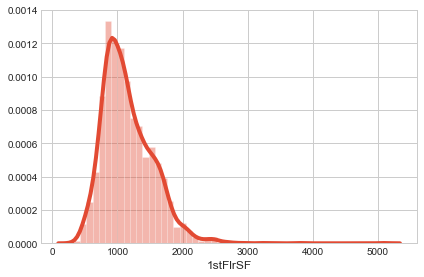

In [61]:
sns.distplot(all_data['1stFlrSF']);

In [62]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)

skewed_feats

MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
MasVnrArea        2.621719
OpenPorchSF       2.529358
WoodDeckSF        1.844792
1stFlrSF          1.257286
GrLivArea         1.068750
LotFrontage       1.058803
BsmtFinSF1        0.980645
BsmtUnfSF         0.919688
2ndFlrSF          0.861556
TotRmsAbvGrd      0.749232
Fireplaces        0.725278
HalfBath          0.696666
TotalBsmtSF       0.671751
BsmtFullBath      0.622415
OverallCond       0.569314
BedroomAbvGr      0.326568
GarageArea        0.216857
OverallQual       0.189591
FullBath          0.165514
GarageCars       -0.219297
YearRemodAdd     -0.450134
YearBuilt        -0.599194
GarageYrBlt      -3.904632
dtype: float64

In [63]:
def fixing_skewness(df):
    """
    This function takes in a dataframe and return fixed skewed dataframe
    """
    ## Import necessary modules 
    from scipy.stats import skew
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    
    ## Getting all the data that are not of "object" type. 
    numeric_feats = df.dtypes[df.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index

    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))

fixing_skewness(all_data)

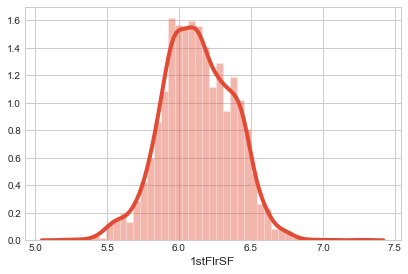

In [64]:
sns.distplot(all_data['1stFlrSF']);

In [65]:
all_data = all_data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

# feture engineering a new feature "TotalFS"
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['YrBltAndRemod']=all_data['YearBuilt']+all_data['YearRemodAdd']

all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] +
                                 all_data['1stFlrSF'] + all_data['2ndFlrSF'])

all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                               all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])


In [66]:
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [67]:
## Creating dummy variable 
final_features = pd.get_dummies(all_data).reset_index(drop=True)
final_features.shape

(2917, 333)

In [68]:
final_features

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,5.939033,1025.651978,0.000000,3,144.117862,0.000000,0.993440,0.000000,29.991052,0.000000,...,0,0,0,0,1,0,0,1,0,0
1,6.234989,0.000000,0.000000,3,181.719186,0.000000,0.000000,0.710895,44.135410,0.000000,...,0,0,0,0,1,0,1,0,0,0
2,5.994335,1040.521059,0.000000,3,110.441033,0.000000,0.993440,0.000000,56.896528,0.000000,...,0,0,0,0,1,0,0,1,0,0
3,6.027703,904.477422,0.000000,3,61.795315,0.000000,0.993440,0.000000,64.808848,16.020712,...,0,0,0,0,1,1,0,0,0,0
4,6.161220,1273.024862,0.000000,4,136.624601,0.000000,0.993440,0.000000,61.166371,0.000000,...,0,0,0,0,1,0,0,1,0,0
5,5.883143,671.029690,7.114653,1,147.876483,0.000000,0.993440,0.000000,17.718036,0.000000,...,0,0,0,0,1,0,0,0,1,0
6,6.456543,0.000000,0.000000,3,230.755721,0.000000,0.993440,0.000000,47.147306,0.000000,...,0,0,0,0,1,0,1,0,0,0
7,6.135566,1185.824256,0.000000,3,165.705771,4.749196,0.993440,0.000000,37.422800,14.958219,...,0,0,0,0,1,0,0,0,1,0
8,6.074708,899.541673,0.000000,2,0.000000,0.000000,0.000000,0.000000,90.703475,14.347076,...,0,0,0,0,1,0,0,1,0,0
9,6.114658,0.000000,0.000000,2,164.606644,0.000000,0.993440,0.000000,28.754166,0.000000,...,0,0,0,0,1,0,0,1,0,0


In [69]:
X = final_features.iloc[:len(y), :]

X_sub = final_features.iloc[len(y):, :]

In [70]:
X

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,5.939033,1025.651978,0.000000,3,144.117862,0.000000,0.99344,0.000000,29.991052,0.000000,...,0,0,0,0,1,0,0,1,0,0
1,6.234989,0.000000,0.000000,3,181.719186,0.000000,0.00000,0.710895,44.135410,0.000000,...,0,0,0,0,1,0,1,0,0,0
2,5.994335,1040.521059,0.000000,3,110.441033,0.000000,0.99344,0.000000,56.896528,0.000000,...,0,0,0,0,1,0,0,1,0,0
3,6.027703,904.477422,0.000000,3,61.795315,0.000000,0.99344,0.000000,64.808848,16.020712,...,0,0,0,0,1,1,0,0,0,0
4,6.161220,1273.024862,0.000000,4,136.624601,0.000000,0.99344,0.000000,61.166371,0.000000,...,0,0,0,0,1,0,0,1,0,0
5,5.883143,671.029690,7.114653,1,147.876483,0.000000,0.99344,0.000000,17.718036,0.000000,...,0,0,0,0,1,0,0,0,1,0
6,6.456543,0.000000,0.000000,3,230.755721,0.000000,0.99344,0.000000,47.147306,0.000000,...,0,0,0,0,1,0,1,0,0,0
7,6.135566,1185.824256,0.000000,3,165.705771,4.749196,0.99344,0.000000,37.422800,14.958219,...,0,0,0,0,1,0,0,0,1,0
8,6.074708,899.541673,0.000000,2,0.000000,0.000000,0.00000,0.000000,90.703475,14.347076,...,0,0,0,0,1,0,0,1,0,0
9,6.114658,0.000000,0.000000,2,164.606644,0.000000,0.99344,0.000000,28.754166,0.000000,...,0,0,0,0,1,0,0,1,0,0


In [71]:
X_sub

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
1458,5.974078,0.000000,0.0,2,107.505912,7.760720,0.000000,0.000000,42.813710,0.000000,...,0,0,0,0,1,0,0,0,0,1
1459,6.274100,0.000000,0.0,3,174.393644,0.000000,0.000000,0.000000,54.675304,0.000000,...,0,0,0,0,1,0,0,0,0,1
1460,6.000965,836.685294,0.0,3,156.263694,0.000000,0.000000,0.000000,28.375984,0.000000,...,0,0,0,0,1,0,0,0,0,1
1461,5.999313,808.385060,0.0,3,128.653472,0.000000,0.000000,0.000000,47.769036,0.000000,...,0,0,0,0,1,0,0,0,0,1
1462,6.245704,0.000000,0.0,2,71.179547,0.000000,0.000000,0.000000,94.312856,0.000000,...,0,0,0,0,1,0,0,0,0,1
1463,5.850508,1072.759688,0.0,3,0.000000,0.000000,0.000000,0.000000,79.571112,0.000000,...,0,0,0,0,1,0,0,0,0,1
1464,6.188566,0.000000,0.0,3,176.002637,0.000000,0.993440,0.000000,39.175106,0.000000,...,0,0,0,0,1,0,0,0,0,1
1465,5.876339,805.925592,0.0,3,0.000000,0.000000,0.000000,0.000000,81.166089,0.000000,...,0,0,0,0,1,0,0,0,0,1
1466,6.280888,0.000000,0.0,2,133.939428,0.000000,0.993440,0.000000,73.212209,0.000000,...,0,0,0,0,1,0,0,0,0,1
1467,5.962000,0.000000,0.0,2,158.086666,6.434559,0.993440,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,1


In [72]:
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

In [73]:
def overfit_reducer(df):
    """
    This function takes in a dataframe and returns a list of features that are overfitted.
    """
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.94:
            overfit.append(i)
    overfit = list(overfit)
    return overfit


overfitted_features = overfit_reducer(X)

X = X.drop(overfitted_features, axis=1)
X_sub = X_sub.drop(overfitted_features, axis=1)

In [74]:
## Train test s
from sklearn.model_selection import train_test_split
## Train test split follows this distinguished code pattern and helps creating train and test set to build machine learning. 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 0)

In [75]:
previous_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,11.870607
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.634606
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,12.206078
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,11.774528
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,11.678448


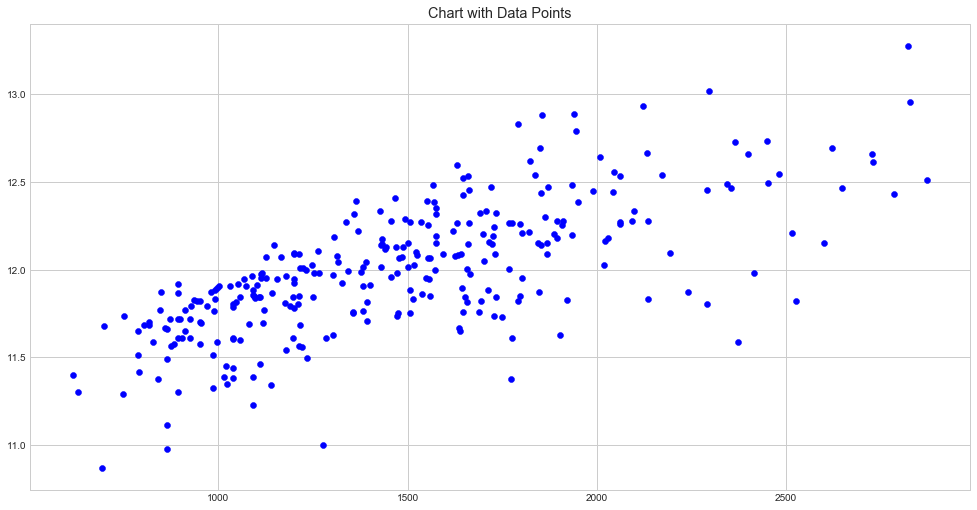

In [76]:
sample_train = previous_train.sample(300)
import seaborn as sns
plt.subplots(figsize = (15,8))
ax = plt.gca()
ax.scatter(sample_train.GrLivArea.values, sample_train.SalePrice.values, color ='b');
plt.title("Chart with Data Points");
#ax = sns.regplot(sample_train.GrLivArea.values, sample_train.SalePrice.values)
#ax.plot((sample_train.GrLivArea.values.min(),sample_train.GrLivArea.values.max()), (sample_train.SalePrice.values.mean(),sample_train.SalePrice.values.mean()), color = 'r');

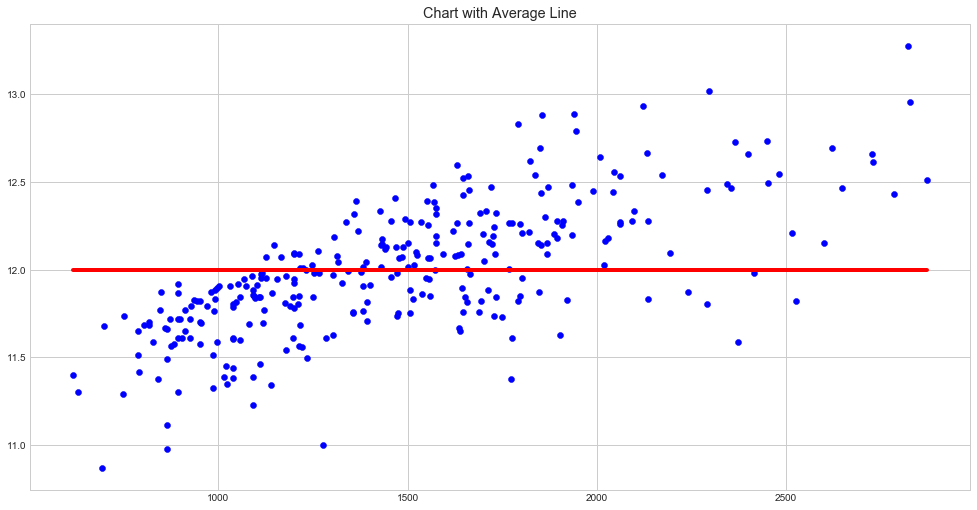

In [77]:
plt.subplots(figsize = (15,8))
ax = plt.gca()
ax.scatter(sample_train.GrLivArea.values, sample_train.SalePrice.values, color ='b');
#ax = sns.regplot(sample_train.GrLivArea.values, sample_train.SalePrice.values)
ax.plot((sample_train.GrLivArea.values.min(),sample_train.GrLivArea.values.max()), (sample_train.SalePrice.values.mean(),sample_train.SalePrice.values.mean()), color = 'r');
plt.title("Chart with Average Line");

In [78]:
## Calculating Mean Squared Error(MSE)
sample_train['mean_sale_price'] = sample_train.SalePrice.mean()
sample_train['mse'] = np.square(sample_train.mean_sale_price - sample_train.SalePrice)
sample_train.mse.mean()
## getting mse
print("Mean Squared Error(MSE) for average line is : {}".format(sample_train.mse.mean()))

Mean Squared Error(MSE) for average line is : 0.13845549331027704


In [79]:
## Calculating the beta coefficients by hand. 
## mean of y. 
y_bar = sample_train.SalePrice.mean()
## mean of x. 
x_bar = sample_train.GrLivArea.mean()
## Std of y
std_y = sample_train.SalePrice.std()
## std of x
std_x = sample_train.GrLivArea.std()
## correlation of x and y
r_xy = sample_train.corr().loc['GrLivArea','SalePrice']
## finding beta_1
beta_1 = r_xy*(std_y/std_x)
## finding beta_0
beta_0 = y_bar - beta_1*x_bar

In [80]:
## getting y_hat, which is the predicted y values. 
sample_train['Linear_Yhat'] = beta_0 + beta_1*sample_train['GrLivArea']

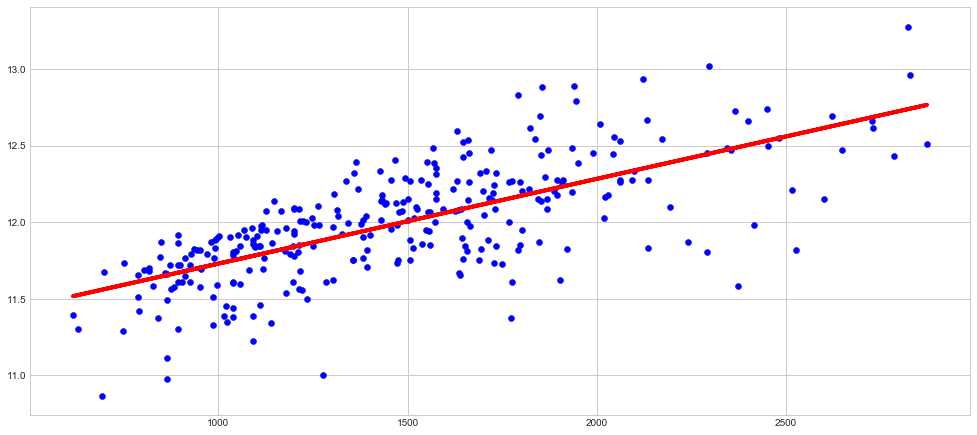

In [81]:
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(sample_train.GrLivArea, sample_train.SalePrice, c='b')
ax.plot(sample_train['GrLivArea'], sample_train['Linear_Yhat'], color='r');

In [82]:
## getting mse
print("Mean Squared Error(MSE) for regression line is : {}".format(np.square(sample_train['SalePrice'] - sample_train['Linear_Yhat']).mean()))

Mean Squared Error(MSE) for regression line is : 0.0692142122571554


In [83]:
from sklearn.metrics import mean_squared_error
mean_squared_error(sample_train['SalePrice'], sample_train.Linear_Yhat)

0.069214212257155336

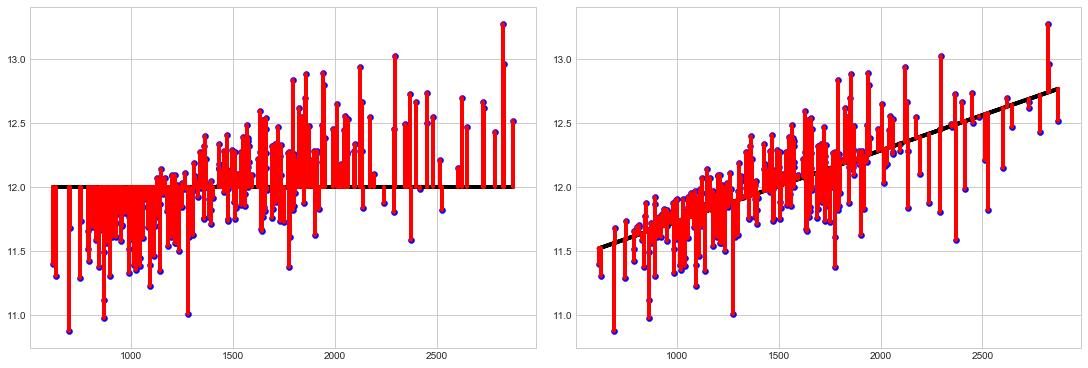

In [84]:
## Creating a customized chart. and giving in figsize and everything. 
fig = plt.figure(constrained_layout=True, figsize=(15,5))
## creating a grid of 3 cols and 3 rows. 
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
#gs = fig3.add_gridspec(3, 3)
#ax1 = fig.add_subplot(grid[row, column])
ax1 = fig.add_subplot(grid[0, :1])

# get the axis
ax1 = fig.gca()

# plot it
ax1.scatter(x=sample_train['GrLivArea'], y=sample_train['SalePrice'], c='b')
ax1.plot(sample_train['GrLivArea'], sample_train['mean_sale_price'], color='k');

# iterate over predictions
for _, row in sample_train.iterrows():
    plt.plot((row['GrLivArea'], row['GrLivArea']), (row['SalePrice'], row['mean_sale_price']), 'r-')
    
ax2 = fig.add_subplot(grid[0, 1:])

# plot it
ax2.scatter(x=sample_train['GrLivArea'], y=sample_train['SalePrice'], c='b')
ax2.plot(sample_train['GrLivArea'], sample_train['Linear_Yhat'], color='k');
# iterate over predictions
for _, row in sample_train.iterrows():
    plt.plot((row['GrLivArea'], row['GrLivArea']), (row['SalePrice'], row['Linear_Yhat']), 'r-')

In [85]:
## importing necessary models.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Call in the LinearRegression object
lin_reg = LinearRegression(normalize=True, n_jobs=-1)
## fit train and test data. 
lin_reg.fit(X_train, y_train)
## Predict test data. 
y_pred = lin_reg.predict(X_test)

In [86]:
## get average squared error(MSE) by comparing predicted values with real values. 
print ('%.2f'%mean_squared_error(y_test, y_pred))

469077539391365705629696.00


In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
lin_reg = LinearRegression()
cv = KFold(shuffle=True, random_state=2, n_splits=10)
scores = cross_val_score(lin_reg, X,y,cv = cv, scoring = 'neg_mean_absolute_error')

In [88]:
print ('%.8f'%scores.mean())

-0.23522270
